In [256]:
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram



import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
gh = pd.read_excel('/Users/majdshamashan/Desktop/Thesis/green_h2_policy_2024.xlsx')
gh.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Duration_yrs,Description
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,NaN,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,NaN,"Finance in the form of debt, equity and guaran..."
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,17 years,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,10 years,For projects with a cumulative electrolyser ca...
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,20 years,Includes “green” metals and low-carbon liquid ...


In [258]:
gh_subset = gh.dropna(subset=['Amount_USD_mn'], axis=0).reset_index(drop=True)

In [259]:
gh_subset.replace({'Instrument_type':{'Grant ': 'Grant'}}, inplace=True)


In [260]:
gh_dummies = pd.get_dummies(gh_subset, drop_first=True, columns=['Status', 'Policy_side', 'Instrument_type'])

In [261]:
cols_to_convert = ['Status_In force', 'Policy_side_Push', 'Instrument_type_Competitive bidding',
                   'Instrument_type_Grant', 'Instrument_type_Loan/guarantee', 'Instrument_type_Tax credit']

gh_dummies[cols_to_convert] = gh_dummies[cols_to_convert].astype(int)

In [262]:
X = gh_dummies.drop(columns=['Country', 'Sector', 'Programme', 'Description', 'Duration_yrs'])

In [263]:
X.head()

,Amount_USD_mn,Status_In force,Policy_side_Push,Instrument_type_Competitive bidding,Instrument_type_Grant,Instrument_type_Loan/guarantee,Instrument_type_Tax credit
0,324.0,1,0,0,1,0,0
1,2000.0,0,1,0,0,1,0
2,10000.0,0,1,0,0,0,1
3,2600.0,1,0,0,0,0,0
4,1200.0,0,1,0,1,0,0


In [264]:
X_scaled = StandardScaler().fit_transform(X)

In [265]:
test = pd.DataFrame(X_scaled)
test

,0,1,2,3,4,5,6
0,-0.424718,0.612372,-1.747178,-0.363803,0.693375,-0.234082,-0.263523
1,-0.083242,-1.632993,0.572351,-0.363803,-1.442221,4.272002,-0.263523
2,1.546717,-1.632993,0.572351,-0.363803,-1.442221,-0.234082,3.794733
3,0.039005,0.612372,-1.747178,-0.363803,-1.442221,-0.234082,-0.263523
4,-0.246238,-1.632993,0.572351,-0.363803,0.693375,-0.234082,-0.263523
...,...,...,...,...,...,...,...
72,-0.478710,0.612372,0.572351,-0.363803,0.693375,-0.234082,-0.263523
73,-0.486656,0.612372,0.572351,-0.363803,0.693375,-0.234082,-0.263523
74,-0.488592,0.612372,0.572351,-0.363803,0.693375,-0.234082,-0.263523
75,-0.488694,0.612372,0.572351,-0.363803,0.693375,-0.234082,-0.263523


In [266]:
'''
num_clusters = [i for i in range(2, 13)]

def agglomerative_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits an agglomerative clustering model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        aggc = AgglomerativeClustering(n_clusters=num)
        aggc.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, aggc.labels_))

    return sil_score


sil_score = agglomerative_sil(num_clusters, X_scaled)
sil_score
'''

'\nnum_clusters = [i for i in range(2, 13)]\n\ndef agglomerative_sil(num_clusters, x_vals):\n    """\n    Accepts as arguments list of ints and data array. \n    Fits an agglomerative clustering model where k = each value in the list of ints.\n    Calculates a silhouette score for each k value. \n    Returns each k-value\'s silhouette score appended to a list.\n    """\n    sil_score = []\n    for num in num_clusters:\n        aggc = AgglomerativeClustering(n_clusters=num)\n        aggc.fit(x_vals)\n        sil_score.append(silhouette_score(x_vals, aggc.labels_))\n\n    return sil_score\n\n\nsil_score = agglomerative_sil(num_clusters, X_scaled)\nsil_score\n'

In [267]:
'''
plot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')
plot.set_xlabel('Number of clusters');
plot.set_ylabel('Silhouette score');
'''

"\nplot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')\nplot.set_xlabel('Number of clusters');\nplot.set_ylabel('Silhouette score');\n"

In [268]:
#agglomerative7 = AgglomerativeClustering(n_clusters=7, compute_distances=True)
#agglomerative7.fit(X_scaled)

In [269]:
#print('Unique labels:', np.unique(agglomerative7.labels_))

In [270]:
#gh_subset['cluster7'] = agglomerative7.labels_

In [271]:
gh_subset.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Duration_yrs,Description
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,NaN,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,NaN,"Finance in the form of debt, equity and guaran..."
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,17 years,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,10 years,For projects with a cumulative electrolyser ca...
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,20 years,Includes “green” metals and low-carbon liquid ...


In [272]:
''''
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)  

labels = agglomerative7.labels_

# Plot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='tab10', s=70)
plt.title('Agglomerative Clustering (k=7) - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
ax.figure.set_facecolor('#e6e6e6')

plt.grid(True)
plt.show()
'''

"'\npca = PCA(n_components=2)\nreduced_data = pca.fit_transform(X_scaled)  \n\nlabels = agglomerative7.labels_\n\n# Plot\nplt.figure(figsize=(8, 6))\nax = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='tab10', s=70)\nplt.title('Agglomerative Clustering (k=7) - PCA Projection')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.legend(title='Cluster')\nax.figure.set_facecolor('#e6e6e6')\n\nplt.grid(True)\nplt.show()\n"

In [273]:
#gh_subset.groupby(by=['cluster7', 'Instrument_type']).size()

In [274]:
#gh_subset.groupby(by=['cluster7', 'Instrument_type', 'Policy_side']).size()

In [275]:
''''
model = agglomerative7

def create_linkage_matrix(model):
    counts = [0] * model.children_.shape[0]
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # original observation
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_,
        model.distances_,
        counts
    ]).astype(float)

    return linkage_matrix

linkage_matrix = create_linkage_matrix(model)

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title("Dendrogram from AgglomerativeClustering model")
plt.axhline(y=8, color='red', linestyle='--', label='5-cluster cut') 
plt.xlabel("Cluster")
plt.ylabel("Distance")

plt.show()
'''

'\'\nmodel = agglomerative7\n\ndef create_linkage_matrix(model):\n    counts = [0] * model.children_.shape[0]\n    n_samples = len(model.labels_)\n    \n    for i, merge in enumerate(model.children_):\n        current_count = 0\n        for child_idx in merge:\n            if child_idx < n_samples:\n                current_count += 1  # original observation\n            else:\n                current_count += counts[child_idx - n_samples]\n        counts[i] = current_count\n\n    linkage_matrix = np.column_stack([\n        model.children_,\n        model.distances_,\n        counts\n    ]).astype(float)\n\n    return linkage_matrix\n\nlinkage_matrix = create_linkage_matrix(model)\n\nplt.figure(figsize=(12, 6))\ndendrogram(linkage_matrix, truncate_mode=\'lastp\', p=30)\nplt.title("Dendrogram from AgglomerativeClustering model")\nplt.axhline(y=8, color=\'red\', linestyle=\'--\', label=\'5-cluster cut\') \nplt.xlabel("Cluster")\nplt.ylabel("Distance")\n\nplt.show()\n'

In [276]:
#grouped_cluster = gh_subset.groupby(by=['cluster7','Instrument_type','Policy_side']).size().reset_index(name='Count')

In [277]:
#grouped_cluster = gh_subset.groupby(by=['cluster3','Instrument_type','Policy_side']).size().reset_index(name='Count')

In [347]:
grouped_cluster2 = gh_subset.groupby(by=['cluster3','Instrument_type','Country']).size().reset_index(name='Count')
grouped_cluster2

,cluster3,Instrument_type,Country,Count
0,0,CfD,Australia,1
1,0,CfD,France,1
2,0,CfD,Germany,2
3,0,CfD,Japan,1
4,0,CfD,Portugal,1
5,0,CfD,UK,1
6,0,Competitive bidding,Austria,1
7,0,Competitive bidding,Canada,1
8,0,Competitive bidding,Denmark,1
9,0,Competitive bidding,European Commission,1


In [278]:
''''
ax = (gh_subset
      .groupby(['cluster7', 'Instrument_type'])
      .size()
      .plot.bar(title='Clusters differentiated by instrument',
                figsize=(8, 5),
                ylabel='Size',
                xlabel='(Cluster, Instrument)'))

ax.figure.set_facecolor('#e6e6e6')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',                  
                (bar.get_x() + bar.get_width()/2,  
                 height),                          
                ha='center', va='bottom',
                fontsize=9, )
plt.xticks(rotation=90)

plt.show()
'''

"'\nax = (gh_subset\n      .groupby(['cluster7', 'Instrument_type'])\n      .size()\n      .plot.bar(title='Clusters differentiated by instrument',\n                figsize=(8, 5),\n                ylabel='Size',\n                xlabel='(Cluster, Instrument)'))\n\nax.figure.set_facecolor('#e6e6e6')\n\nfor bar in ax.patches:\n    height = bar.get_height()\n    ax.annotate(f'{int(height)}',                  \n                (bar.get_x() + bar.get_width()/2,  \n                 height),                          \n                ha='center', va='bottom',\n                fontsize=9, )\nplt.xticks(rotation=90)\n\nplt.show()\n"

In [279]:
''''
grouped_cluster['Cluster_Status'] = grouped_cluster.apply(
    lambda row: f"({row['cluster7']}, {row['Policy_side']})", axis=1
)

# Step 2: Plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=grouped_cluster,
    x='Cluster_Status',
    y='Count',
    hue='Instrument_type'
)
plt.title("Clusters differentiated by instrument and status")
plt.ylabel("Size")
plt.xlabel("(Cluster, Status)")
plt.xticks(rotation=45)
plt.legend(title='Instrument')
ax.figure.set_facecolor('#e6e6e6')
plt.tight_layout()
plt.show()
'''

'\'\ngrouped_cluster[\'Cluster_Status\'] = grouped_cluster.apply(\n    lambda row: f"({row[\'cluster7\']}, {row[\'Policy_side\']})", axis=1\n)\n\n# Step 2: Plot using Seaborn\nplt.figure(figsize=(8, 6))\nax = sns.barplot(\n    data=grouped_cluster,\n    x=\'Cluster_Status\',\n    y=\'Count\',\n    hue=\'Instrument_type\'\n)\nplt.title("Clusters differentiated by instrument and status")\nplt.ylabel("Size")\nplt.xlabel("(Cluster, Status)")\nplt.xticks(rotation=45)\nplt.legend(title=\'Instrument\')\nax.figure.set_facecolor(\'#e6e6e6\')\nplt.tight_layout()\nplt.show()\n'

In [369]:
gh_subset.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Duration_yrs,Description,cluster3
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,NaN,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,0
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,NaN,"Finance in the form of debt, equity and guaran...",0
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,17 years,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,2
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,10 years,For projects with a cumulative electrolyser ca...,0
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,20 years,Includes “green” metals and low-carbon liquid ...,1


In [280]:
gh.replace({'Instrument_type':{'Grant ':'Grant'}}, inplace=True)


In [281]:
''''
keys_list = ['Country', 'Sector', 'Status', 'Programme', 'Instrument_type', 'Policy_side',
            'Amount_USD_mn', 'Duration_yrs', 'Description']

outer2 = pd.merge(gh, gh_subset, on=keys_list, how='outer')
outer2
'''

"'\nkeys_list = ['Country', 'Sector', 'Status', 'Programme', 'Instrument_type', 'Policy_side',\n            'Amount_USD_mn', 'Duration_yrs', 'Description']\n\nouter2 = pd.merge(gh, gh_subset, on=keys_list, how='outer')\nouter2\n"

In [282]:
#outer2['cluster7'] = outer2['cluster7'].astype('Int64')
#outer2

In [283]:
#outer2 = outer2.iloc[:, [0,1,2,3,4,5,6,7,9,8]]
#outer2

In [284]:
#outer2.to_excel('/Users/majdshamashan/Desktop/Thesis/green_h2_policy_2024(2).xlsx', index=False)

In [285]:
#outer2['cluster7'].unique()

In [286]:
# Clustering with K = 3 
agglomerative3 = AgglomerativeClustering(n_clusters=3, compute_distances=True)
agglomerative3.fit(X_scaled)

AgglomerativeClustering(compute_distances=True, n_clusters=3)

In [287]:
print('Unique labels:', np.unique(agglomerative3.labels_))

Unique labels: [0 1 2]


In [288]:
gh_subset['cluster3'] = agglomerative3.labels_
gh_subset.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Duration_yrs,Description,cluster3
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,NaN,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,0
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,NaN,"Finance in the form of debt, equity and guaran...",0
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,17 years,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,2
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,10 years,For projects with a cumulative electrolyser ca...,0
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,20 years,Includes “green” metals and low-carbon liquid ...,1


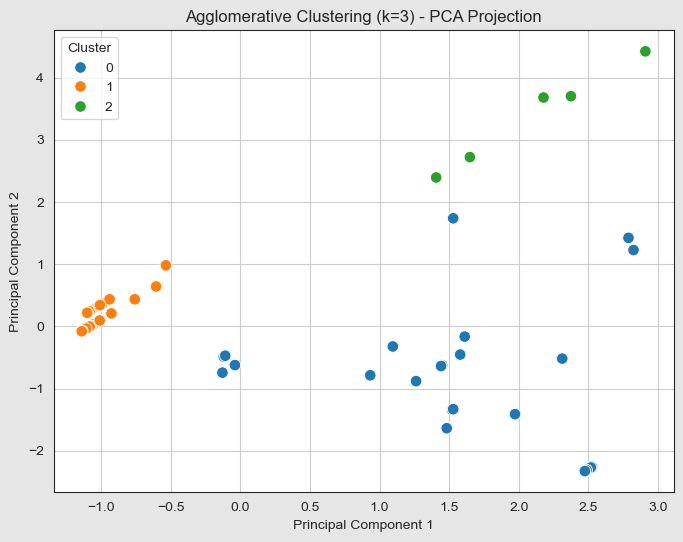

In [367]:

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)  

labels = agglomerative3.labels_

# Plot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='tab10', s=70)
plt.title('Agglomerative Clustering (k=3) - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
ax.figure.set_facecolor('#e6e6e6')

plt.grid(True)
plt.show()


In [290]:
gh_subset.groupby(by=['cluster3', 'Instrument_type']).size()

cluster3  Instrument_type    
0         CfD                     7
          Competitive bidding     9
          Grant                   6
          Loan/guarantee          4
1         Grant                  46
2         Tax credit              5
dtype: int64

In [291]:
gh_subset.groupby(by=['cluster3', 'Instrument_type', 'Policy_side']).size()

cluster3  Instrument_type      Policy_side
0         CfD                  Pull            7
          Competitive bidding  Pull            5
                               Push            4
          Grant                Pull            6
          Loan/guarantee       Pull            1
                               Push            3
1         Grant                Push           46
2         Tax credit           Push            5
dtype: int64

In [292]:
gh_subset.groupby(by=['cluster3', 'Country']).size()

cluster3  Country            
0         Australia              3
          Austria                1
          Canada                 2
          Chile                  2
          Denmark                1
          European Commission    1
          France                 1
          Germany                4
          India                  2
          Japan                  2
          Netherlands            2
          Oman                   1
          Poland                 1
          Portugal               1
          Spain                  1
          UK                     1
1         Australia              1
          Chile                  1
          China                  1
          European Commission    4
          Finland                1
          France                 1
          Germany                1
          India                  1
          India                  4
          Italy                  5
          Japan                  1
          Lithuania      

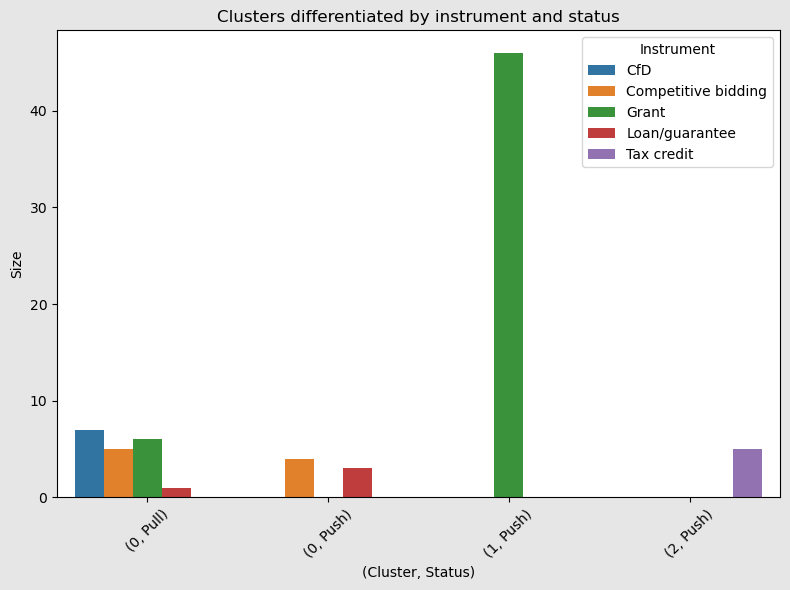

In [293]:
grouped_cluster['Cluster_Status'] = grouped_cluster.apply(
    lambda row: f"({row['cluster3']}, {row['Policy_side']})", axis=1
)

# Step 2: Plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=grouped_cluster,
    x='Cluster_Status',
    y='Count',
    hue='Instrument_type'
)
plt.title("Clusters differentiated by instrument and status")
plt.ylabel("Size")
plt.xlabel("(Cluster, Status)")
plt.xticks(rotation=45)
plt.legend(title='Instrument')
ax.figure.set_facecolor('#e6e6e6')
plt.tight_layout()
plt.show()

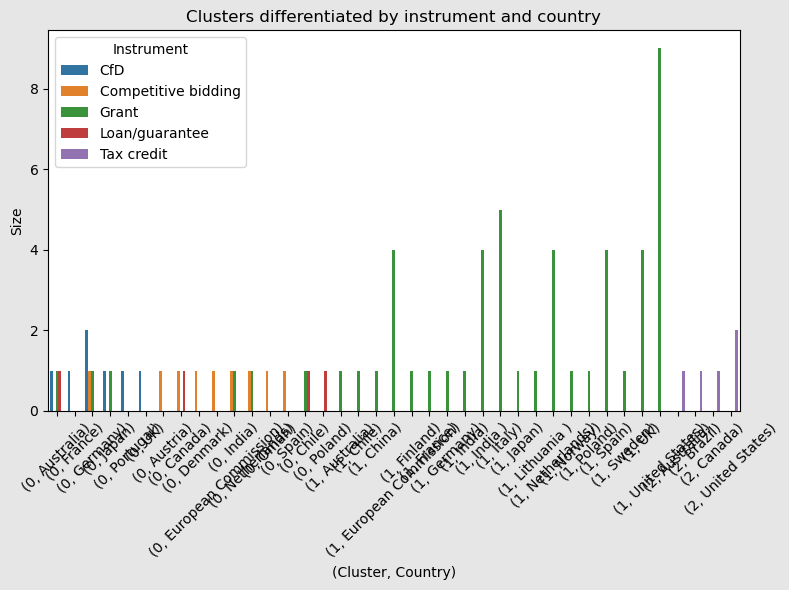

In [353]:
grouped_cluster2['Cluster_Country'] = grouped_cluster2.apply(
    lambda row: f"({row['cluster3']}, {row['Country']})", axis=1
)

# Step 2: Plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=grouped_cluster2,
    x='Cluster_Country',
    y='Count',
    hue='Instrument_type'
)
plt.title("Clusters differentiated by instrument and country")
plt.ylabel("Size")
plt.xlabel("(Cluster, Country)")
plt.xticks(rotation=45)
plt.legend(title='Instrument')
ax.figure.set_facecolor('#e6e6e6')
plt.tight_layout()
plt.show()

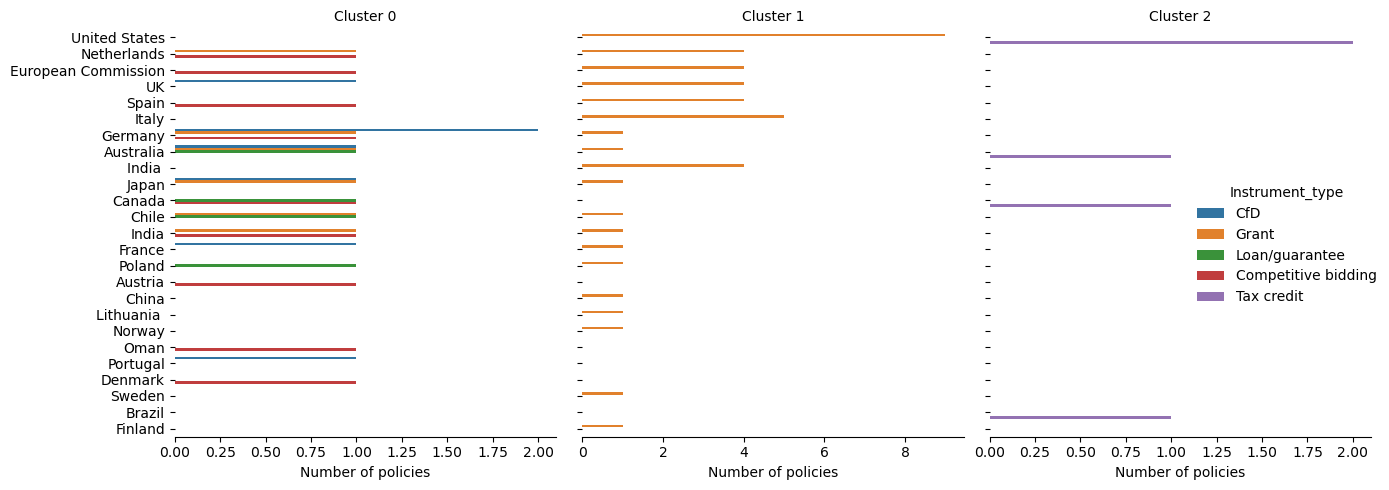

In [363]:
pivot = (gh_subset
         .groupby(['cluster3', 'Country', 'Instrument_type'])
         .size()
         .reset_index(name='Count'))

# order countries by their total number of policies (optional)
country_order = (pivot.groupby('Country')['Count']
                       .sum()
                       .sort_values(ascending=False)
                       .index)

# ── facet grid ────────────────────────────────────────────────
g = sns.catplot(data=pivot,
                kind='bar',
                x='Count',
                y='Country',
                hue='Instrument_type',
                col='cluster3',          # one panel per cluster
                order=country_order,     # consistent ordering
                height=5, aspect=0.8,
                sharex=False)            # each cluster has its own scale

g.set_titles("Cluster {col_name}")
g.set_xlabels("Number of policies")
g.set_ylabels("")
g.despine(left=True)
plt.tight_layout()
plt.show()

In [295]:
gh_subset['cluster3'] = gh_subset['cluster3'].astype()

In [296]:
gh_subset2 = gh_subset.replace({'Country': {'European Commission': 'Belgium'}})

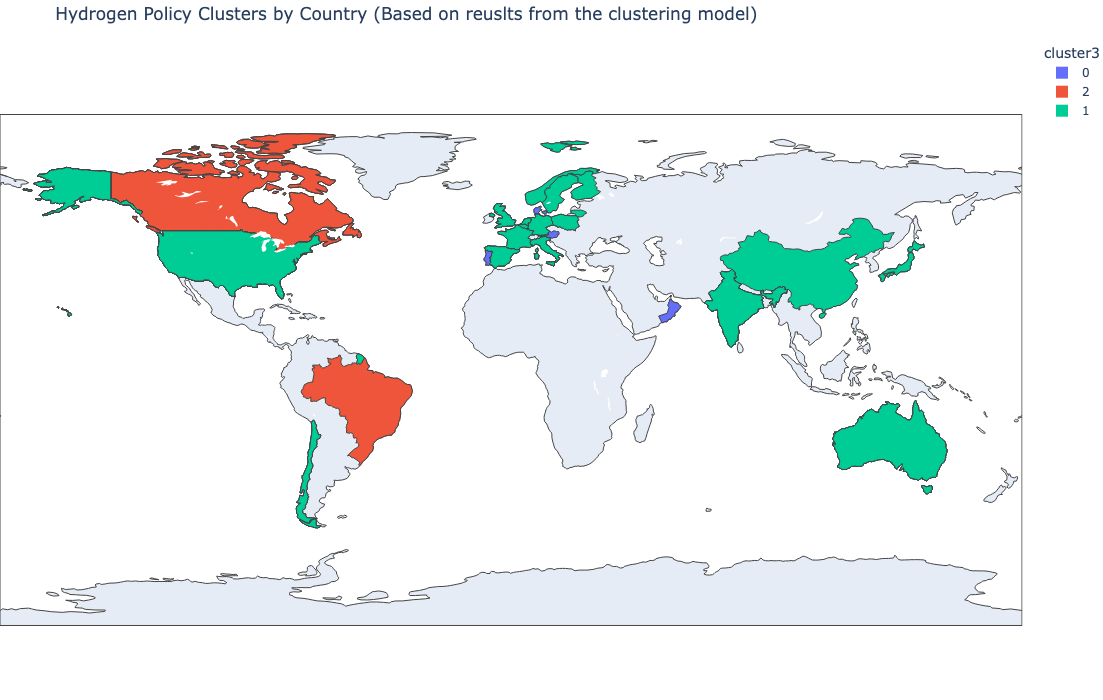

In [297]:
import plotly.express as px

fig = px.choropleth(
    gh_subset2,
    locations="Country",
    locationmode="country names",
    color="cluster3",  # Must be numeric or categorical
    hover_name="Country",
    hover_data=["Instrument_type"],
    title="Hydrogen Policy Clusters by Country (Based on reuslts from the clustering model)",
    projection="equirectangular"
)

fig.update_layout(
    width=1200,
    height=700,
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

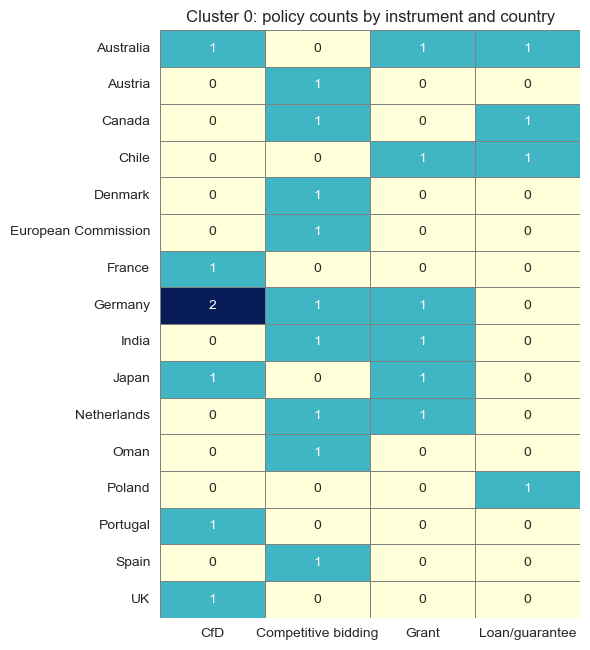

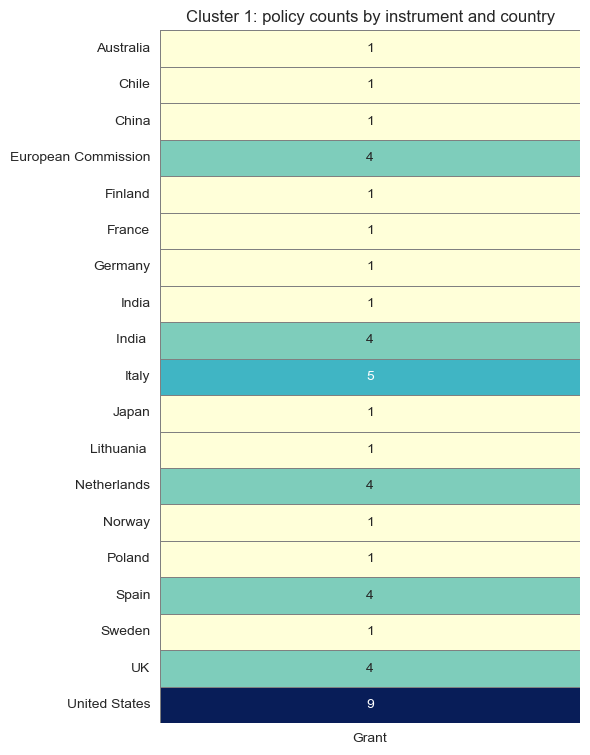

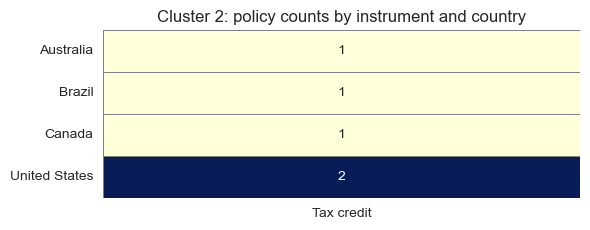

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns

# make sure seaborn uses a white background
sns.set_style("white")

# loop over the distinct cluster IDs
for c in sorted(gh_subset['cluster3'].unique()):
    
    # 1️⃣  keep only the rows that belong to this cluster
    tmp = gh_subset[gh_subset['cluster3'] == c]
    
    # 2️⃣  build a country × instrument count table
    #     (index = Country, columns = Instrument_type)
    table = (tmp
             .pivot_table(index='Country',
                          columns='Instrument_type',
                          values='cluster3',   # any column is fine, we only count rows
                          aggfunc='size',
                          fill_value=0)        # put 0 instead of NaN for empty cells
             .sort_index())                   # optional: alphabetical countries
    
    # 3️⃣  draw the heat-map
    plt.figure(figsize=(6, 0.35 * table.shape[0] + 1))  # auto-height: ~0.35 inch per row
    sns.heatmap(table,
                annot=True, fmt='d',          # show the counts as integers
                cmap='YlGnBu',                # colour palette
                linewidths=.4, linecolor='grey',  # thin grid lines
                cbar=False)                   # no colour bar – numbers are explicit
    
    plt.title(f"Cluster {c}: policy counts by instrument and country")
    plt.xlabel("")                           # tidy up axes labels
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


In [375]:
df = pd.read_excel('/Users/majdshamashan/Desktop/Thesis/green_h2_policy_2025(2).xlsx')
df.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Duration_yrs,cluster7,Description
0,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,NaN,3.0,"Finance in the form of debt, equity and guaran..."
1,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,NaN,1.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...
2,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,20 years,5.0,Includes “green” metals and low-carbon liquid ...
3,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,17 years,2.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...
4,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,10 years,1.0,For projects with a cumulative electrolyser ca...


In [377]:
keys_list = ['Country', 'Sector', 'Status', 'Programme', 'Instrument_type', 'Policy_side',
            'Amount_USD_mn', 'Duration_yrs', 'Description']

outer3 = pd.merge(df, gh_subset, on=keys_list, how='outer')
outer3

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Duration_yrs,cluster7,Description,cluster3
0,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,NaN,3.0,"Finance in the form of debt, equity and guaran...",0
1,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,NaN,1.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,0
2,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,20 years,5.0,Includes “green” metals and low-carbon liquid ...,1
3,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,17 years,2.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,2
4,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,10 years,1.0,For projects with a cumulative electrolyser ca...,0
...,...,...,...,...,...,...,...,...,...,...,...
102,United States,In force,Hydrogen demonstration,NaN,Grant,Push,59.0,NaN,4.0,For R&D projects for medium-heavy-duty fuellin...,1
103,United States,In force,Hydrogen production,IRA’s §45V clean‑hydrogen production tax credit,Tax credit,Push,20000.0,10 years,2.0,Provides up to USD 3 for every kilogram of ren...,2
104,United States,In force,Industry,Industrial Demonstrations Program,Grant,Push,1700.0,NaN,4.0,CAPEX grants across six projects,1
105,United States,In force,RD&D funding,NaN,Grant,Push,430.0,NaN,4.0,An increase from USD 150 mn funding in 2021,1


In [385]:
outer3['cluster3'] = outer3['cluster3'].astype('Int64')

In [387]:
outer3 = outer3.iloc[:, [0,1,2,3,4,5,6,7,8,10,9]]

In [389]:
outer3.to_excel('/Users/majdshamashan/Desktop/Thesis/green_h2_policy_2025(3).xlsx', index=False)